In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve

In [372]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1817217510158477708
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5729419264
locality {
  bus_id: 1
  links {
  }
}
incarnation: 216397414874532813
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [2]:
df = pd.read_csv('./data/v2-4.csv', index_col=False)

In [3]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()

In [4]:
y = y-1
print(Counter(y))
y = np.array(y)

Counter({1: 5958432, 2: 1263234, 3: 193638, 0: 65699})


In [376]:
#rus = RandomUnderSampler(sampling_strategy={0: 250000, 3: 250000}, random_state=42)

# # Fit and apply ClusterCentroids to the training data
# X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

# # Create an instance of SMOTEENN
# smote_enn = SMOTE(sampling_strategy={0: 250000, 3: 250000}, random_state=42)

# # Fit and apply SMOTE + ENN to the training data
# X_train_balan, y_train_balan = smote_enn.fit_resample(X_train_resampled, y_train_resampled)

# # Print the class distribution after sampling
# print("Class distribution after SMOTE + ENN:", np.bincount(y_train_balan))

In [377]:
# def custom_scoring(y_true, y_pred, verbose=False):
#     report = classification_report(y_true, y_pred, output_dict=True)
#     total_f1 = 0
#     beta_weights = {
#         '0': 0.5,
#         '1': 1,
#         '2': 1,
#         '3': 2,
#     }
#     for cl in range(0, 4):
#         pr = report[str(cl)]['precision']
#         rc = report[str(cl)]['recall']
#         beta = beta_weights[str(cl)]
#         beta_f1 = ((1+beta**2)*pr*rc)/(pr*(beta**2) + rc)
#         if verbose: 
#             print(f'beta f1 for level [{cl}]: {beta_f1}, pr: {pr}, rc: {rc}')
#         total_f1 += beta_f1

#     avg_f1 = total_f1/4
#     if verbose:
#         print(f"macro avg for f1: {avg_f1}")
#     return avg_f1

# batch_size = 16
# epochs = 1

# def cross_valid(X, y, estimator, cv=5, verbose=False):
#     round = 1
#     total_f1 = 0
#     x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#     x_train_valid.reset_index()
#     kf = KFold(n_splits=cv, shuffle=True, random_state=42)
#     print('Validation data')
#     for i, (train_index, valid_index) in enumerate(kf.split(x_train_valid)):
#         x_train, x_valid = x_train_valid.iloc[train_index], x_train_valid.iloc[valid_index]
#         y_train, y_valid = y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]
        
#         x_train_balan, y_train_balan = rus.fit_resample(x_train, y_train)

#         # if verbose:
#         #     print('After under sampling:')
#         #     print(f'Length of training data: {len(x_train_balan)}, and its distribution among each severity {Counter(y_train_balan)}')

#         estimator.fit(
#             x_train_balan,
#             y_train_balan,
#             validation_split=0.2,
#             batch_size=batch_size,
#             epochs=epochs,
#             callbacks=[
#                 tf.keras.callbacks.ReduceLROnPlateau(),
#             ]
#         )
#         y_valid_pred = estimator.predict(x_valid)
#         beta_f1 = custom_scoring(y_valid, y_valid_pred, verbose=False)
#         print(f'Round {round} beta_f1: {beta_f1}')
#         total_f1 += beta_f1
#         round += 1
        
#     avg_betaf1 = total_f1 / cv
#     print(f'average beta f1-score: {avg_betaf1}')

#     print('Testing data')
#     y_test_pred = estimator.predict(x_test)
#     y_test_pred = np.argmax(y_test_pred, axis=1)
#     y_test = np.argmax(y_test, axis=1)
#     print(classification_report(y_test, y_test_pred))
#     beta_f1 = custom_scoring(y_test, y_test_pred, verbose=True)
#     print(f'beta f1-score: {beta_f1}')

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [379]:
# rus = RandomUnderSampler(random_state=42)

# def custom_scoring(y_true, y_pred, verbose=False):
#     '''
#     customize the scoring function for the severity classification task (4 classes)

#     Output:
#         macro Beta f1 score
#         weighted Beta f1 score
#     '''
#     report = classification_report(y_true, y_pred, output_dict=True)
#     macro_beta_f1 = 0
#     weighted_beta_f1 = 0
#     beta_weights = {
#         '0': 0.5,
#         '1': 1,
#         '2': 1,
#         '3': 2,
#     }
#     total_data_count = report['weighted avg']['support']
#     for cl in range(4):
#         pr = report[str(cl)]['precision']
#         rc = report[str(cl)]['recall']
#         beta = beta_weights[str(cl)]
#         beta_f1 = ((1+beta**2)*pr*rc)/(pr*(beta**2) + rc)
#         if verbose: 
#             print(f'beta f1 for level [{cl}]: {beta_f1}, pr: {pr}, rc: {rc}')

#         support_proportion = report[str(cl)]['support'] / total_data_count
#         weighted_beta_f1 += beta_f1 * support_proportion
#         macro_beta_f1 += beta_f1*0.25

#     print(f"macro beta f1: {macro_beta_f1}")
#     print(f"weighted beta f1: {weighted_beta_f1}")
#     return macro_beta_f1, weighted_beta_f1


# def cross_valid(X, y, estimator, cv=5, verbose=False, balance_cls=False):
#     '''
#     K-Fold cross validation for training data

#     Print:

#         Average macro f1 score in k-fold
#         Average weighted f1 score in k-fold
#     '''
#     total_macro_beta_f1 = 0
#     total_weighted_beta_f1 = 0
#     X.reset_index()
#     kf = KFold(n_splits=cv, shuffle=True, random_state=42)
#     print('Validation data')
#     for i, (train_index, valid_index) in enumerate(kf.split(X)):
#         x_train, x_valid = X[train_index], X[valid_index]
#         y_train, y_valid = y[train_index], y[valid_index]

#         if balance_cls:
#             x_train, y_train = rus.fit_resample(x_train, y_train)
#             if verbose:
#                 print('After under sampling:')
#                 print(f'Length of training data: {len(x_train)}, and its distribution among each severity {Counter(y_train)}')

#         estimator.fit(x_train, y_train)
#         y_valid_pred = estimator.predict(x_valid)
#         macro_beta_f1, weighted_beta_f1 = custom_scoring(y_valid, y_valid_pred, verbose=False)
#         print(f'Round {i} macro beta f1-score: {macro_beta_f1}')
#         print(f'Round {i} weighted beta f1-score: {weighted_beta_f1}')
#         total_macro_beta_f1 += macro_beta_f1
#         total_weighted_beta_f1 += weighted_beta_f1

#     avg_macro_betaf1 = total_macro_beta_f1 / cv
#     avg_weighted_betaf1 = total_weighted_beta_f1 / cv
#     print(f'average macro beta f1-score after kfold: {avg_macro_betaf1}')
#     print(f'average weighted beta f1-score after kfold: {avg_weighted_betaf1}')


# def test(estimator, x_test, y_test):
#     '''
#     Output standard classification report and customize scoring output
#     '''
#     print('Testing data:')
#     y_test_pred = estimator.predict(x_test)
#     print(classification_report(y_test, y_test_pred))
#     custom_scoring(y_test, y_test_pred, verbose=False)


# def auc_pr(estimator, x_test, y_test):
#     y_scores = estimator.predict_proba(x_test)[:, 1]
#     precision = dict()
#     recall = dict()
#     n_classes = 4
#     for i in range(n_classes):
#         precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_scores[:, i])
#         plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

#     plt.xlabel("recall")
#     plt.ylabel("precision")
#     plt.legend(loc="best")
#     plt.title("precision vs. recall curve")
#     plt.show()


In [380]:
# def custom_scoring(y_true, y_pred, verbose=False):
#     report = classification_report(y_true, y_pred, output_dict=True)
#     total_f1 = 0
#     beta_weights = {
#         '0': 0.5,
#         '1': 1,
#         '2': 1,
#         '3': 2,
#     }
#     for cl in range(0, 4):
#         pr = report[str(cl)]['precision']
#         rc = report[str(cl)]['recall']
#         # beta = beta_weights[str(cl)]
#         beta_f1 = ((1+beta**2)*pr*rc)/(pr*(beta**2) + rc)
#         if verbose: 
#             print(f'beta f1 for level [{cl}]: {beta_f1}, pr: {pr}, rc: {rc}')
#         total_f1 += beta_f1

#     avg_f1 = total_f1/4
#     if verbose:
#         print(f"macro avg for f1: {avg_f1}")
#     return avg_f1

# batch_size = 16
# epochs = 5

# def cross_valid(X, y, estimator, cv=5, verbose=False):
#     round = 1
#     total_f1 = 0
#     x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
#     #rus = RandomUnderSampler(sampling_strategy={1: 200000, 2: 200000}, random_state=42)
#     rus = RandomUnderSampler(random_state=42)

#     #smote = SMOTE(sampling_strategy={0: 200000, 3: 200000}, random_state=42)

#     # x_train_valid, y_train_valid = smote.fit_resample(x_train_valid, y_train_valid)
    
#     kf = KFold(n_splits=cv, shuffle=True, random_state=42)
#     print('Validation data')
#     for i, (train_index, valid_index) in enumerate(kf.split(x_train_valid)):
#         x_train, x_valid = x_train_valid[train_index], x_train_valid[valid_index]
#         y_train, y_valid = y_train_valid[train_index], y_train_valid[valid_index]

#         x_train_balan, y_train_balan = rus.fit_resample(x_train, y_train)

#         estimator.fit(
#             x_train_balan,
#             y_train_balan,
#             batch_size=batch_size,
#             epochs=epochs,
#         )
        
#         y_valid_pred = np.argmax(estimator.predict(x_valid), axis=1)
#         beta_f1 = custom_scoring(y_valid, y_valid_pred, verbose=False)
#         print(f'Round {round} beta_f1: {beta_f1}')
#         total_f1 += beta_f1
#         round += 1
        
#     avg_betaf1 = total_f1 / cv
#     print(f'average beta f1-score: {avg_betaf1}')

#     print('Testing data')
#     y_test_pred = np.argmax(estimator.predict(x_test), axis=1)
#     print(classification_report(y_test, y_test_pred))
#     beta_f1 = custom_scoring(y_test, y_test_pred, verbose=True)
#     print(f'beta f1-score: {beta_f1}')

In [381]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [382]:
# Counter(y_train)

In [383]:
# y_train_balan = np.array(y_train_balan)
# y_train_balan

In [384]:
# Counter(y_train_balan)

In [6]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
batch_size = 32
epochs = 10

history = model.fit(
    x_train_valid,
    y_train_valid,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
    ]
)

Epoch 1/10
  2257/149621 [..............................] - ETA: 10:37 - loss: 0.4719 - accuracy: 0.8335

KeyboardInterrupt: 

In [387]:
cross_valid(X, y, model, cv=5, verbose=False)

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [ ]:
# import matplotlib.pyplot as plt

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
y_test = np.array(y_test)
y_test.shape[0]

NameError: name 'y_test' is not defined

In [ ]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

NameError: name 'X_test' is not defined

In [ ]:
y_pred = model.predict(X_test)
y_pred

NameError: name 'X_test' is not defined

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels.shape[0]

NameError: name 'y_pred' is not defined

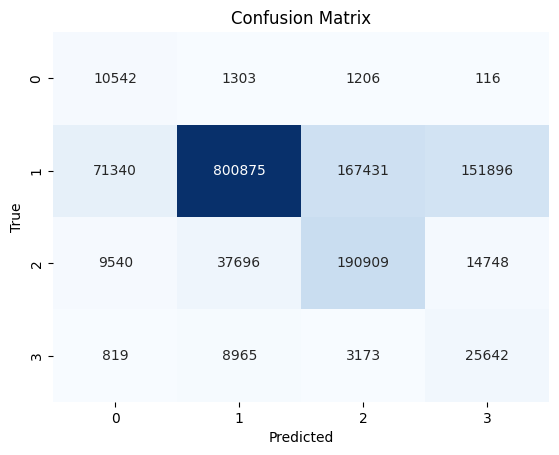

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_pred (predicted labels)
cm = confusion_matrix(y_test, y_pred_labels)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Assuming y_test contains the true class labels
y_true = y_test

# Assuming y_pred_labels is the predicted class labels obtained using np.argmax
#y_pred_labels = np.argmax(y_pred_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred_labels, average='weighted')
recall = recall_score(y_true, y_pred_labels, average='weighted')
f1 = f1_score(y_true, y_pred_labels, average='weighted')

# Display the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Alternatively, you can use classification_report to display precision, recall, and f1-score for each class
print(classification_report(y_true, y_pred_labels))

Precision: 0.8448
Recall: 0.6871
F1-Score: 0.7375
              precision    recall  f1-score   support

           0       0.11      0.80      0.20     13167
           1       0.94      0.67      0.79   1191542
           2       0.53      0.75      0.62    252893
           3       0.13      0.66      0.22     38599

    accuracy                           0.69   1496201
   macro avg       0.43      0.72      0.46   1496201
weighted avg       0.84      0.69      0.74   1496201



In [ ]:
model.save('ANN.h5')

In [ ]:
model = tf.keras.models.load_model('ANN.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080  